In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
%matplotlib inline

1. Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800].  
Найдите ее среднее значение и дисперсию.  

$ \hat{x} = \frac{200+800}{2} = 500 $  
$ \sigma_x^2 = \frac{(800-200)^2}{12} = 30000 $

___

2. О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2.  
Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Дисперсия для непрерывного равномерного распределения выглядит как:  

$$ \sigma_x^2 = \frac{(b-a)^2}{12} $$  

В этом уравнении у нас известны 2 переменные:  

$ \sigma_x^2 = 0.2 $  
$ a = 0.5 $  

Значит,

$0.2 = \frac{(b-0.5)^2}{12} \Rightarrow (b-0.5)^2 = 2.4 \Rightarrow b = \pm\sqrt{2.4}+0.5 $  

Получаем два корня уравнения:  

$b_1 \approx -1.05 $  
$b_2 \approx 2.05 $  

Так как мы говорим про правую границу, можно предположить что b > a, а значит первый корень нам не подходит  

$ a = 0.5 $  
$ b \approx 2.05 $  
$ \hat{x} = \frac{a+b}{2} \approx 1.275  $


In [2]:
a = 0.5
b = 2.05
mu = (a + b) / 2
var = (b - a) ** 2 / 12
sigma = np.sqrt(var)
P = 2 * sigma / (b - a)
print(f'Для распределения по отрезку от {a} до {b} \nСреднее: {mu}, \nДисперсия: {var},'
      f' \nStd: {sigma}, \nВероятность в 1 сигме: {P}')

Для распределения по отрезку от 0.5 до 2.05 
Среднее: 1.275, 
Дисперсия: 0.2002083333333333, 
Std: 0.4474464586219599, 
Вероятность в 1 сигме: 0.5773502691896257


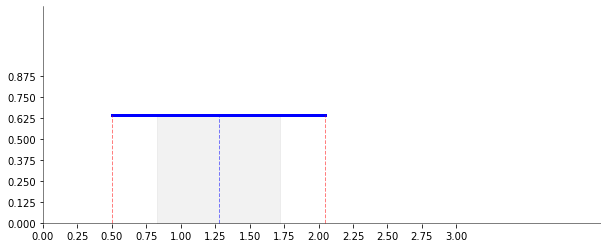

In [3]:
plt.figure(figsize=(10,4))
plt.box(False)
plt.ylim(-0.002, 2/(b-a))
plt.xlim(0, b + 2)

y = 1 / (b - a)
plt.plot([a, b], [y, y], color='blue', lw=3)
plt.plot([a, a], [0, y], '--', color='red', alpha=0.5, lw=1)
plt.plot([b, b], [0, y], '--', color='red', alpha=0.5, lw=1)
plt.plot([mu, mu], [0, y], '--', color='blue', alpha=0.5, lw=1)
plt.axvspan(mu-sigma, mu+sigma, ymin=0, ymax=0.78/(b-a), alpha=0.1, color='grey')

plt.yticks(np.arange(0, 1, 0.125))
plt.xticks(np.arange(0, b + 1, 0.25))

plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.show()

___

3. Непрерывная случайная величина X распределена нормально и задана плотностью распределения  

$$ f(x) = \frac{1}{4 \cdot \sqrt{2\pi}}\cdot {e}^{\frac{-(x+2)^2}{32}} $$  

Найдите:  
а) M(X)  
б) D(X)  
в) std(X) (среднее квадратичное отклонение)  

Нормальная плотность распределения в общем виде выглядит как:  

$$ \frac{1}{\sigma_x \cdot \sqrt{2\pi}}\cdot {e}^{-\frac{(x-m_x)^2}{2\sigma_x^2}} $$  

где  
$ \sigma_x $ - среднее квадратическое отклонение  
$ \sigma_x^2 $ - дисперсия  
$ m_x $ - мат. ожидание  

Следовательно,  

$ \sigma_x = 4 $  
$ \sigma_x^2 = 16 $  
$ m_x = -2 $

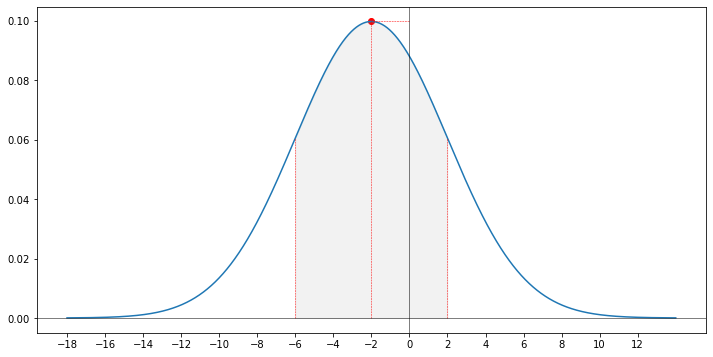

In [4]:
def f_x(x, mu, sigma):
    return np.exp(-(x-mu) ** 2/(2 * sigma ** 2))/(sigma * np.sqrt(2 * np.pi))

def plot_norm(mu, sigma, dot_array=[], d_flag=False):
    plt.figure(figsize=(12,6))
    x = np.linspace(mu - sigma * 4, mu + sigma * 4, 10000)
    ticks = np.arange(mu - sigma * 4,mu + sigma * 4,sigma // 2)

    y = f_x(x, mu, sigma)
    plt.plot(x, y)
    
    plt.plot([mu,mu], [0, f_x(mu, mu, sigma)], '--', lw=0.5, color='red')
    plt.scatter(mu, f_x(mu, mu, sigma), color='red')
    
    
    plt.plot([mu-sigma,mu-sigma], [0, f_x(mu-sigma, mu, sigma)], '--', lw=0.5, color='red')
    plt.plot([mu+sigma,mu+sigma], [0, f_x(mu-sigma, mu, sigma)], '--', lw=0.5, color='red')

    plt.fill_between(x,y,0,where=(x>mu-sigma) & (x<mu+sigma), color='grey', alpha=0.1)
    
    if dot_array:
        plt.scatter(dot_array, np.zeros(len(dot_array)), color='green')
    
    if not d_flag:
        plt.plot([0,mu], [f_x(mu, mu, sigma), f_x(mu, mu, sigma)], '--', lw=0.5, color='red')
        plt.axvline(lw=0.5, color='black')
    
    plt.axhline(lw=0.5, color='black')
    plt.xticks(ticks)
    plt.show()

mu = -2
sigma = 4

plot_norm(mu,sigma)

___

4. Рост взрослого населения города X имеет нормальное распределение.
Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см.
Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:  

а) больше 182 см  

$ P(182<x<+\infty) = \Phi(\frac{+\infty-174}{8})-\Phi(\frac{182-174}{8}) = 0.5-\Phi(1) = 0.5 - 0.3413 = 0.158 $

б) больше 190 см  

$ P(190<x<+\infty) = \Phi(\frac{+\infty-174}{8})-\Phi(\frac{190-174}{8}) = 0.5 - \Phi(2) = 0.5-0.4772 = 0.0228  $

в) от 166 см до 190 см  

$ P(166<x<190) = \Phi(\frac{190-174}{8})-\Phi(\frac{166-174}{8}) = 0.4772 - (-0.3413) = 0.8185  $

г) от 166 см до 182 см  

$ P(166<x<182) = \Phi(\frac{182-174}{8})-\Phi(\frac{166-174}{8}) = 0.3413 - (-0.3413) = 0.6826 $

д) от 158 см до 190 см  

$ P(158<x<190) = \Phi(\frac{190-174}{8})-\Phi(\frac{158-174}{8}) = 0.4772 - (-0.4772) = 0.9545 $

е) не выше 150 см или не ниже 190 см (полагаю здесь опечатка, должно быть не выше 190 или не ниже 150, иначе вероятность 0)

$ P(150\leq x \leq 190) = \Phi(\frac{190-174}{8})-\Phi(\frac{150-174}{8}) = 0.4772 - (-0.4987) = 0.9759 $

ё) не выше 150 см или не ниже 198 см (см (е))

$ P(150\leq x \leq 198) = \Phi(\frac{198-174}{8})-\Phi(\frac{150-174}{8}) = 0.4987 - (-0.4987) = 0.9973 $

ж) ниже 166 см  

$ P(-\infty<x<166) = \Phi(\frac{166-174}{8})-\Phi(\frac{-\infty-174}{8}) = -0.3413 -(-0.5) = 0.1587 $

In [47]:
# Вычисление значения интегральной функции Лапласа
laplas = lambda x: scipy.stats.norm.cdf(x) - 0.5

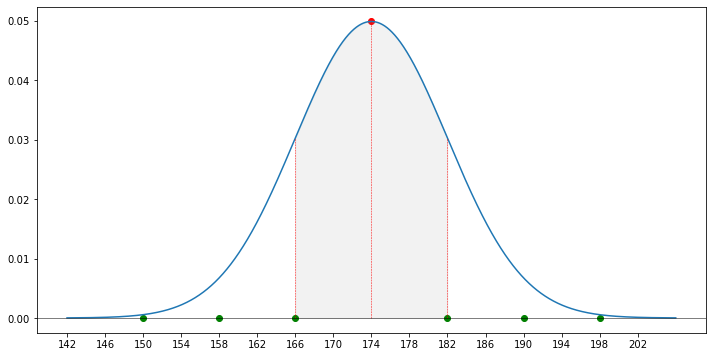

In [5]:
mu = 174
sigma = 8

plot_norm(mu, sigma, [150, 158, 166, 182, 190, 198], True)

___

5. На сколько сигм (средних квадратичных отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25 кв.см?

$ \sigma = \sqrt{25} = 5 $  

$ \frac{190-178}{5} = 2.4 $  

Ответ:  На 2.4 сигмы